# Getting started

## Overview

**sinaps** is a [Python](https://www.python.org) package providing fast, flexible and expressive tools to model signal propagation in neurons. It is an efficient framework to build computational models of neuron. It is based on the [Cable theory](https://en.wikipedia.org/wiki/Cable_theory) and [Nernst-Plank equation](https://en.wikipedia.org/wiki/Nernst%E2%80%93Planck_equation) for the electrodiffusion in the neuron.

The primary data structures of sinaps are :

* `Section` wich aims to represent a segment of a neuron with uniform physicals values
* `Neuron` wich aims to represent a complete neuron is a directed graph whose edges are of `Section` type.
* `Channels` wich aim to represent ionic channels with various dynamics

The outputs of a simulation are :

* Electric potential for each time step and position in the neuron
* Concentration of species for each time step and position in the neuron



## Introduction
This is a short introduction to sinaps for new users.

Customarily, we import as follows:

In [18]:
import sinaps as sn

### Object creation
Creating an empty `Neuron`:

In [19]:
nrn = sn.Neuron()

In [20]:
nrn

Neuron(V_ref=0, name='Neuron02081', reactions=[], sections={})

Creating a `Section`, letting sinaps setting default attribute :

In [21]:
sec = sn.Section()

In [22]:
sec

Section **Section0001**

* L: 100 um
* a: 1 um
* C_m: 1 uF/cm² (c_m=62.832 fF)
* R_l: 150 Ω.cm (r_l=477.46 aΩ)
* channels: 
* point_channels: 

Adding a `HodgkinHuxley` [channel](https://en.wikipedia.org/wiki/Hodgkin%E2%80%93Huxley_model) to the newly created section:

In [23]:
sec.add_channel(sn.channels.Hodgkin_Huxley())

In [24]:
sec

Section **Section0001**

* L: 100 um
* a: 1 um
* C_m: 1 uF/cm² (c_m=62.832 fF)
* R_l: 150 Ω.cm (r_l=477.46 aΩ)
* channels: <sinaps.channels.Hodgkin_Huxley object at 0x7f09e8126978>
* point_channels: 

Adding a `HeavysideCurrent` channel with a current of `100` pA from `2` to `4` ms at the beginning of the section:

In [25]:
sec.add_channel(sn.channels.HeavysideCurrent(100,2,4),0)

In [26]:
sec

Section **Section0001**

* L: 100 um
* a: 1 um
* C_m: 1 uF/cm² (c_m=62.832 fF)
* R_l: 150 Ω.cm (r_l=477.46 aΩ)
* channels: <sinaps.channels.Hodgkin_Huxley object at 0x7f09e8126978>
* point_channels: 0:<sinaps.channels.HeavysideCurrent object at 0x7f09e8126f60>

Adding the section `s` to the neuron `n` as an edge between nodes `0` and `1` :

In [27]:
nrn.add_section(sec,0,1)

In [28]:
nrn

Neuron(V_ref=0, name='Neuron02081', reactions=[], sections={Section(C0={}, C_m=1, D={}, L=100, R_l=150, V0=0, a=1, dx=None, name='Section0001'): (0, 1)})

Viewing the neuron structure :

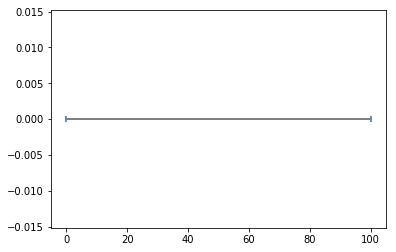

In [29]:
nrn.view.graph()

### Simulation running

Creating a `Simulation` of neuron `n` with spatial resolution `10` um:

In [30]:
sim = sn.Simulation(nrn,dx=10)

In [31]:
nrn[0]

Section **Section0001**

* L: 100 um
* a: 1 um
* C_m: 1 uF/cm² (c_m=62.832 fF)
* R_l: 150 Ω.cm (r_l=477.46 aΩ)
* channels: <sinaps.channels.Hodgkin_Huxley object at 0x7f09e8126978>
* point_channels: 0:<sinaps.channels.HeavysideCurrent object at 0x7f09e8126f60>

Running the simulation for timespan `0` to `20` ms:

In [32]:
sim.run((0,20))

100%|██████████| 20.0/20 [00:01<00:00, 13.02ms/s]     


Results of the simulation are stored as a [pandas](https://pandas.pydata.org/) Dataframe:

### Viewing results

In [33]:
sim.view.V()

:NdOverlay   [Variable]
   :Curve   [Time]   (value)

## Section

The class `Section` represents a section of neuron with uniform physical values

The characteristics of a section are :

* The length `L` in **μm**
* The radius `a` in **μm**
* The menbrane capacitance `C_m` in **μF/cm²**
* The longitunal resistance `R_l` in **Ohm.cm**
* The initial potential `V0` in **mV**

### Default parameters

In [34]:
sec0 = sn.Section(name="Sample section 1")
sec0

Section **Sample section 1**

* L: 100 um
* a: 1 um
* C_m: 1 uF/cm² (c_m=62.832 fF)
* R_l: 150 Ω.cm (r_l=477.46 aΩ)
* channels: 
* point_channels: 

### Customized values

sinaps uses the [param](https://param.holoviz.org/) library. You can set custom parameter at the object creation :

In [35]:
sec1 = sn.Section(L=50,a=2)

In [36]:
sec1

Section **Section0003**

* L: 50 um
* a: 2 um
* C_m: 1 uF/cm² (c_m=125.66 fF)
* R_l: 150 Ω.cm (r_l=119.37 aΩ)
* channels: 
* point_channels: 

You can also set the attribute value once the object created :

In [37]:
sec1.R_l=100

In [38]:
sec1

Section **Section0003**

* L: 50 um
* a: 2 um
* C_m: 1 uF/cm² (c_m=125.66 fF)
* R_l: 100 Ω.cm (r_l=79.577 aΩ)
* channels: 
* point_channels: 

## Channels

Ion channels can be added to a section.

There are two types of channels
+ Point channels
+ Density channels




### Density Channels
Denisty channels are used to model channels that distributed on all the section. The current is given per unit of membrane surface

#### Leak Channel


In [39]:
lc1=sn.channels.LeakChannel()
lc1

LeakChannel(Veq=0 V, G_m=300 uS/cm²)

In [40]:
lc2=sn.channels.LeakChannel(
            Veq=10, #mV
            G_m= 1 #mS/cm²
            )
lc2

LeakChannel(Veq=10 mV, G_m=1 mS/cm²)

In [41]:
sec0.add_channel(lc1)
sec0

Section **Sample section 1**

* L: 100 um
* a: 1 um
* C_m: 1 uF/cm² (c_m=62.832 fF)
* R_l: 150 Ω.cm (r_l=477.46 aΩ)
* channels: LeakChannel(Veq=0 V, G_m=300 uS/cm²)
* point_channels: 

### Point Channels
Point channels are used to model channel in specific location of the section, the current is given in absolute

### Constant current

In [42]:
pc=sn.channels.ConstantCurrent(1)

In [43]:
sec0.add_channel(pc,0)
sec0

Section **Sample section 1**

* L: 100 um
* a: 1 um
* C_m: 1 uF/cm² (c_m=62.832 fF)
* R_l: 150 Ω.cm (r_l=477.46 aΩ)
* channels: LeakChannel(Veq=0 V, G_m=300 uS/cm²)
* point_channels: 0:ConstantCurrent(I=1 pA)

## Neuron

The class `Neuron` represents a set of sections connected together

In [44]:
N=sn.Neuron()

In [45]:
N.add_section(sec0,0,1)
N.add_section(sec1,1,2)

The structure of the neuron is stored in the attribute `sections` wich is a Dict with the section as key and the nodes connected by the section as values (2-tuple) :

In [46]:
N.sections

{Section(C0={}, C_m=1, D={}, L=100, R_l=150, V0=0, a=1, dx=None, name='Sample section 1'): (0,
  1),
 Section(C0={}, C_m=1, D={}, L=50, R_l=100, V0=0, a=2, dx=None, name='Section0003'): (1,
  2)}

### Acces the section :
By index in the neuron structure

In [47]:
N[0]

Section **Sample section 1**

* L: 100 um
* a: 1 um
* C_m: 1 uF/cm² (c_m=62.832 fF)
* R_l: 150 Ω.cm (r_l=477.46 aΩ)
* channels: LeakChannel(Veq=0 V, G_m=300 uS/cm²)
* point_channels: 0:ConstantCurrent(I=1 pA)

By name

In [48]:
N['Sample section 2']

[]

Not that if sections have same names or same part of the name a list of section will be returned

In [49]:
N['Sample section']

Section **Sample section 1**

* L: 100 um
* a: 1 um
* C_m: 1 uF/cm² (c_m=62.832 fF)
* R_l: 150 Ω.cm (r_l=477.46 aΩ)
* channels: LeakChannel(Veq=0 V, G_m=300 uS/cm²)
* point_channels: 0:ConstantCurrent(I=1 pA)

You can change the parameters of multiples section at once :

In [50]:
N['Sample section'].a=1

Access all the sections :

In [51]:
N[:]

[Section(C0={}, C_m=1, D={}, L=100, R_l=150, V0=0, a=1, dx=None, name='Sample section 1'),
 Section(C0={}, C_m=1, D={}, L=50, R_l=100, V0=0, a=2, dx=None, name='Section0003')]

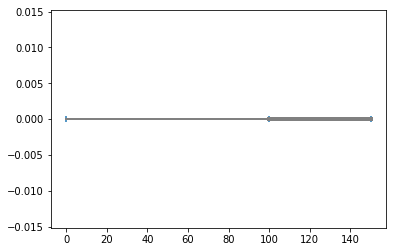

In [52]:
N.view.graph()

## Simulation

The class simulation is linked to a specific neuron and is used to run voltage propagation simulation and electrodiffusion simulations with some custom spatial and time resolution.
The object stores also results of the simulation

Create the simulation with neuron `N` and spatial resolution of `20 um` :

In [53]:
sim=sn.Simulation(N,dx=20)

Run the simulation for timespan `0 - 300 ms` : 

In [54]:
sim.run((0,300))

100%|██████████| 300.0/300 [00:00<00:00, 899.87ms/s]   


Acces the results of the simulation, potential for each time and position :

In [55]:
sim.V

Section       Sample section 1                                            \
Position (μm)        10.000000     30.000000     50.000000     70.000000   
Time                                                                       
0.000000              0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
0.000002              0.000002  2.509324e-10  3.736438e-14  5.563639e-18   
0.000004              0.000003  7.918423e-10  1.610918e-13  3.041723e-17   
0.000025              0.000020  3.162004e-08  4.731016e-11  7.032639e-14   
0.000047              0.000037  9.125399e-08  1.900242e-10  3.632524e-13   
...                        ...           ...           ...           ...   
85.245147             0.541920  5.343220e-01  5.286473e-01  5.248756e-01   
105.858383            0.541873  5.342749e-01  5.286001e-01  5.248282e-01   
126.471619            0.541868  5.342694e-01  5.285944e-01  5.248222e-01   
232.286054            0.541882  5.342832e-01  5.286082e-01  5.248361e-01   
300.000000            0.541886  5.342872e-01  5.286121e-01  5.248400e-01   

Section                       Section0003                              
Position (μm)     90.000000     8.333333      25.000000     41.666667  
Time                                                                   
0.000000       0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
0.000002       8.283449e-22  1.298956e-25  8.347389e-29  5.367669e-32  
0.000004       5.485955e-21  1.010326e-24  7.456403e-28  5.414901e-31  
0.000025       1.043331e-16  1.624481e-19  1.032034e-21  6.598164e-24  
0.000047       6.589674e-16  1.212339e-18  8.880078e-21  6.435300e-23  
...                     ...           ...           ...           ...  
85.245147      5.229934e-01  5.229937e-01  5.229937e-01  5.229938e-01  
105.858383     5.229456e-01  5.229457e-01  5.229457e-01  5.229457e-01  
126.471619     5.229395e-01  5.229395e-01  5.229395e-01  5.229395e-01  
232.286054     5.229535e-01  5.229535e-01  5.229535e-01  5.229535e-01  
300.000000     5.229574e-01  5.229574e-01  5.229574e-01  5.229574e-01  

[82 rows x 8 columns]

In [60]:
sim['Section0003'].plot()

:NdOverlay   [Variable]
   :Curve   [Time]   (value)

On peut definir d par section avec sec.dx=truc  il faut alors lancer Simulation avec dx=0 sinon le dx global est utilise

In [61]:
sim[:].plot()

:NdOverlay   [Variable]
   :Curve   [Time]   (value)

Access the scipy [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) output :

In [58]:
sim.sol

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 164
     njev: 1
      nlu: 22
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 2.11802124e-06, 4.23604248e-06, 2.54162549e-05,
       4.65964672e-05, 1.17989536e-04, 1.89382605e-04, 2.60775674e-04,
       5.38353380e-04, 8.15931085e-04, 1.09350879e-03, 1.63559172e-03,
       2.17767466e-03, 2.71975759e-03, 3.26184052e-03, 4.25587229e-03,
       5.24990406e-03, 6.24393584e-03, 7.23796761e-03, 8.23199938e-03,
       9.93266037e-03, 1.16333214e-02, 1.33339824e-02, 1.50346434e-02,
       1.67353043e-02, 1.95455180e-02, 2.23557316e-02, 2.51659452e-02,
       2.79761588e-02, 3.07863724e-02, 3.54038068e-02, 4.00212412e-02,
       4.46386756e-02, 4.92561100e-02, 5.38735444e-02, 6.20057425e-02,
       7.01379406e-02, 7.82701387e-02, 8.64023367e-02, 9.45345348e-02,
       1.14709746e-01, 1.34884957e-01, 1.55060168e-01, 1.75235379e-01,
       2.07865881e-01, 2.40496384e-01, 